In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('fivethirtyeight')


In [84]:
#read in the data
data = pd.read_csv('BTC-USD.csv')
#set the date as the index
data = data.set_index(pd.DatetimeIndex(data['Date']))
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-01,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
2019-01-02,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09
2019-01-03,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09
2019-01-04,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09
2019-01-05,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09
...,...,...,...,...,...,...,...
2023-03-27,3/27/2023,27994.068360,28037.925780,26606.689450,27139.888670,27139.888670,1.818890e+10
2023-03-28,3/28/2023,27132.888670,27460.718750,26677.818360,27268.130860,27268.130860,1.778360e+10
2023-03-29,3/29/2023,27267.031250,28619.542970,27259.662110,28348.441410,28348.441410,2.068495e+10


In [85]:
future_day= 30

In [86]:
#Create a new column
#data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
#Show the data
data[['Close', str(future_day)+'_Day_Price_Forecast']]
#data



,Close,30_Day_Price_Forecast
Date,,
2019-01-01,3843.520020,3457.792725
2019-01-02,3943.409424,3487.945313
2019-01-03,3836.741211,3521.060791
2019-01-04,3857.717529,3464.013428
2019-01-05,3845.194580,3459.154053
...,...,...
2023-03-27,27139.888670,NaN
2023-03-28,27268.130860,NaN
2023-03-29,28348.441410,NaN


In [87]:
X = np.array(data[['Close']])
X = X[:data.shape[0] - future_day]
print(X)

[[ 3843.52002 ]
 [ 3943.409424]
 [ 3836.741211]
 ...
 [23522.87109 ]
 [23147.35352 ]
 [23646.55078 ]]


In [88]:
Y = np.array(data[str(future_day)+'_Day_Price_Forecast'])
Y = Y[:- future_day]
print(Y)

[ 3457.792725  3487.945313  3521.060791 ... 28348.44141  28033.5625
 28478.48438 ]


In [89]:
val = np.array(data[['Close']])
val = val[- future_day:]
val


array([[23475.4668 ],
       [22362.67969],
       [22353.34961],
       [22435.51367],
       [22429.75781],
       [22219.76953],
       [21718.08008],
       [20363.02148],
       [20187.24414],
       [20632.41016],
       [22163.94922],
       [24197.5332 ],
       [24746.07422],
       [24375.96094],
       [25052.78906],
       [27423.92969],
       [26965.87891],
       [28038.67578],
       [27767.23633],
       [28175.81641],
       [27307.4375 ],
       [28333.97266],
       [27493.28516],
       [27494.70703],
       [27994.33008],
       [27139.88867],
       [27268.13086],
       [28348.44141],
       [28033.5625 ],
       [28478.48438]])

In [90]:
#Split the data
#Chia tập dữ liệu thành tập train, test và predict theo tỷ lệ 7-1-2
X_train = X[:int(X.shape[0]*0.6)]
Y_train = Y[:int(Y.shape[0]*0.6)]

X_test = X[int(X.shape[0]*0.6):int(X.shape[0]*0.9)]
Y_test = Y[int(Y.shape[0]*0.6):int(Y.shape[0]*0.9)]

X_val = X[int(X.shape[0]*0.9):]
Y_val = Y[int(Y.shape[0]*0.9):]



In [91]:
len(X_test)

456

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_pred = scaler.transform(data[['Close']])

c:\APP\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, randint
svr = SVR()
# Tạo dictionary chứa các giá trị hyperparameters để thử nghiệm
param_grid = {'C':[0.01, 0.1, 1, 10 ,100],
              'gamma': [0.01, 0.1, 1, 10 ,100],
              'kernel': ['linear', 'rbf','sigmoid']}

In [94]:
X_Grid = np.concatenate([X_train_scaled,X_val_scaled])
Y_Grid = np.concatenate([Y_train,Y_val])

In [95]:
X_Grid.shape

(1065, 1)

In [96]:
# Tạo một đối tượng GridSearchCV với model là SVR, dictionary chứa các hyperparameters, và 5 fold cross validation
grid_search = GridSearchCV(svr, param_grid, refit=True, cv=8, scoring='neg_mean_squared_error')

In [97]:
# Huấn luyện đối tượng GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=8, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [98]:
# In ra bộ hyperparameters tốt nhất
best_para=grid_search.best_params_
kernel_best=best_para['kernel']
C_best=best_para['C']
gamma_best=best_para['gamma']
print(best_para)

{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}


In [99]:
grid_search.best_score_


-49250229.09129249

In [100]:
from sklearn.svm import SVR
svr_linear = SVR(kernel=kernel_best, C= C_best, gamma= gamma_best)
svr_linear.fit(X_train_scaled, Y_train)

SVR(C=100, gamma=0.01, kernel='linear')

In [101]:
svr_linear_confidence = svr_linear.score(X_train_scaled, Y_train)
print('svr_rbf accuracy: ', svr_linear_confidence)

svr_rbf accuracy:  0.8725033617535005


In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

X_test_pred = svr_linear.predict(X_test_scaled)

val_mse = mean_squared_error(Y_test, X_test_pred)
val_rmse = np.sqrt(val_mse)

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_test, X_test_pred)

# Tính toán R2 giữa giá trị thực tế (y_true) và giá trị dự đoán (y_pred)
r2 = r2_score(Y_test, X_test_pred)

print("MAPE:", mape)
print("RMSE:", val_rmse)
print("R2-quare:", r2)

MAPE: 0.15280061954073712
RMSE: 7736.1197412890815
R2-quare: 0.6722846072354023


In [103]:
from sklearn.metrics import mean_squared_error
# Tính toán giá trị RMSE
X_val_pred = svr_linear.predict(X_val_scaled)
rmse = mean_squared_error(Y_val, X_val_pred, squared= False)
rmse
# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_val, X_val_pred)
# Tính toán R2 giữa giá trị thực tế (y_true) và giá trị dự đoán (y_pred)
r2 = r2_score(Y_test, X_test_pred)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R2-quare:", r2)

MAPE: 0.12275001102064376
RMSE: 3333.933006272422
R2-quare: 0.6722846072354023


Dự đoán

In [104]:
# # 13. Dự báo 30 ngày tiếp theo
# # Khởi tạo danh sách đầu vào x_input từ tập dữ liệu test
# x_input = X_test[-future_day:].reshape(-1, 1)

# # Dự đoán giá cho 30 ngày tiếp theo
# lst_output = []
# for i in range(30):
#     # Dự đoán giá cho ngày tiếp theo
#     x_input = scaler.transform(x_input)
#     yhat = svr_linear.predict(x_input)
    
#     # Lưu giá dự đoán vào danh sách kết quả
#     lst_output.append(yhat[0])
    
    
#     # Cập nhật đầu vào x_input bằng cách đẩy dự đoán vào cuối và cắt bớt phần tử đầu tiên
#     # x_input = np.append(x_input[0][1:], yhat[0]).reshape(1, future_day)
#     # x_input =np.append(x_input[:,1:], yhat[0], axis=1)
#     x_input = np.append(x_input[:][1:], yhat[0]).reshape(-1, 1)

In [105]:
# Y_val_scaled = scaler.transform(Y_val)
# last_30_days = svr_linear.predict(Y_val_scaled)
# last_30_days= last_30_days.reshape(-1,1)
# # last_30_days = scaler.fit_transform(last_30_days)
# # last_30_days = svr_linear.predict(last_30_days)
# #test = last_30_days
# # last_30_days = last_30_days[-future_day:]
# print(last_30_days)
# last_30_days.shape

In [106]:
# 13. Dự báo 30 ngày tiếp theo
# Khởi tạo danh sách đầu vào x_input từ tập dữ liệu test
x_input = Y_val[-30:].reshape(-1, 1)
x_input = scaler.transform(x_input)
# Dự đoán giá cho 30 ngày tiếp theo
i=0
lst_output = []
for i in range(future_day):
    # Dự đoán giá cho ngày tiếp theO
    
    yhat = svr_linear.predict(x_input)
    print("{} day output {}".format(i,yhat[0]))
    print(x_input.shape)
    # Lưu giá dự đoán vào danh sách kết quả
    
    lst_output.append(yhat[0])
    
    # Cập nhật đầu vào x_input bằng cách đẩy dự đoán vào cuối và cắt bớt phần tử đầu tiên
    # x_input = np.append(x_input[0][1:], yhat[0]).reshape(1, future_day)
    # x_input =np.append(x_input[:,1:], yhat[0], axis=1)
    yhat = yhat.reshape(-1,1)
    yhat = scaler.transform(yhat)
    x_input = np.append(x_input[1:], yhat[0]).reshape(-1, 1)
    i=i+1

0 day output 22822.275868928053
(30, 1)
1 day output 21815.7007189165
(30, 1)
2 day output 21807.261165122934
(30, 1)
3 day output 21881.58292916643
(30, 1)
4 day output 21876.37644753947
(30, 1)
5 day output 21686.430875253252
(30, 1)
6 day output 21232.626073908123
(30, 1)
7 day output 20006.903470444966
(30, 1)
8 day output 19847.903513679532
(30, 1)
9 day output 20250.579865099113
(30, 1)
10 day output 21635.93843477923
(30, 1)
11 day output 23475.423347333253
(30, 1)
12 day output 23971.607886614976
(30, 1)
13 day output 23636.820731920798
(30, 1)
14 day output 24249.047779034074
(30, 1)
15 day output 26393.870642178823
(30, 1)
16 day output 25979.53933976876
(30, 1)
17 day output 26949.94118990538
(30, 1)
18 day output 26704.409764669123
(30, 1)
19 day output 27073.992186699288
(30, 1)
20 day output 26288.497258024116
(30, 1)
21 day output 27217.05292997931
(30, 1)
22 day output 26456.606355049676
(30, 1)
23 day output 26457.892512119346
(30, 1)
24 day output 26909.828144715742
(

In [107]:
Y_test_pred= Y_test.reshape(-1,1)
print(Y_test_pred.shape)
Y_test_pred

(456, 1)


array([[41626.19531],
       [39974.89453],
       [39201.94531],
       [38152.98047],
       [39747.50391],
       [40869.55469],
       [42816.5    ],
       [44555.80078],
       [43798.11719],
       [46365.40234],
       [45585.03125],
       [45593.63672],
       [44428.28906],
       [47793.32031],
       [47096.94531],
       [47047.00391],
       [46004.48438],
       [44695.35938],
       [44801.1875 ],
       [46717.57813],
       [49339.17578],
       [48905.49219],
       [49321.65234],
       [49546.14844],
       [47706.11719],
       [48960.78906],
       [46942.21875],
       [49058.66797],
       [48902.40234],
       [48829.83203],
       [47054.98438],
       [47166.6875 ],
       [48847.02734],
       [49327.72266],
       [50025.375  ],
       [49944.625  ],
       [51753.41016],
       [52633.53516],
       [46811.12891],
       [46091.39063],
       [46391.42188],
       [44883.91016],
       [45201.45703],
       [46063.26953],
       [44963.07422],
       [47

In [108]:
print(X.shape)

(1521, 1)


In [109]:
X_train_pred = svr_linear.predict(X_train_scaled)

In [110]:
# Tạo biểu đồ
actual = np.arange(len(data['Close']))
Predict = np.arange(len(data['Close'])- 30, len(data['Close']))

#index X_train
index_X_train = np.arange(len(X_train_pred))
#index X_val
index_X_test = np.arange(len(X_train_pred), len(X_train_pred) + len(X_test_pred))

#index X_test
index_X_val = np.arange(len(X_train_pred) + len(X_test_pred),len(X_train_pred) + len(X_test_pred) + len(X_val_pred))

In [111]:
Predict

array([1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531,
       1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542,
       1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550])

In [112]:
X_train_pred= X_train_pred.reshape(-1,1)
print(index_X_train.shape)

(912,)


In [113]:
lst_output = np.array(lst_output)

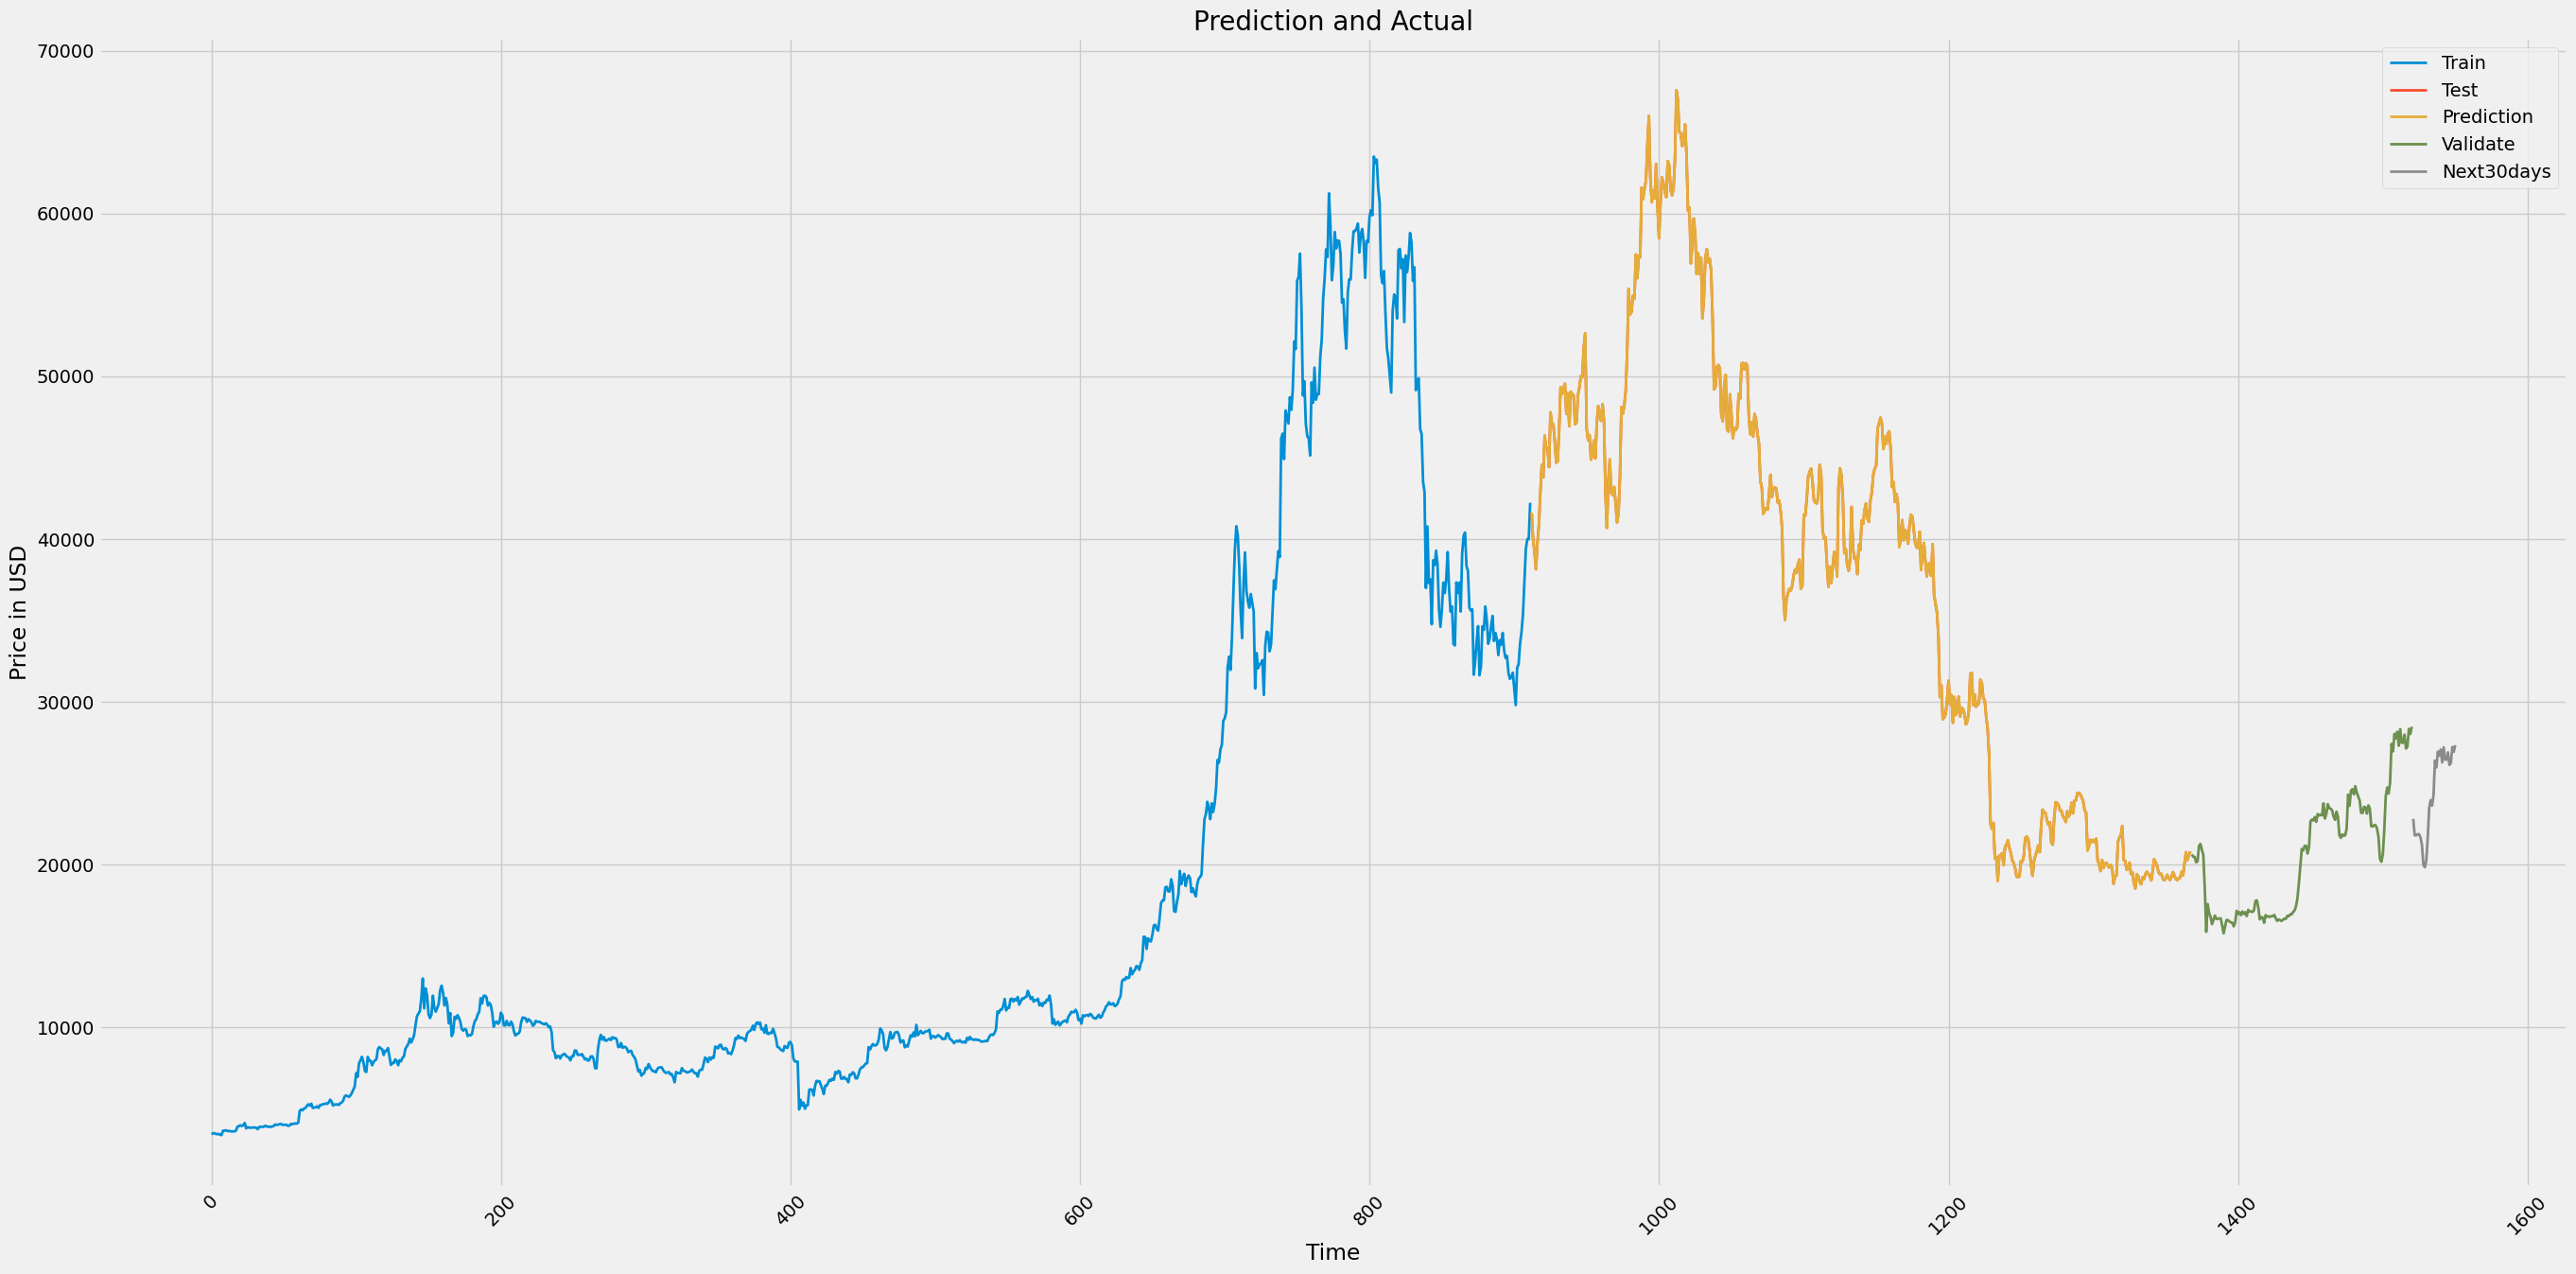

In [114]:
X_test_pred = X_test_pred.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)

plt.figure(figsize=(30,15))
plt.grid(True)

# last_30_days = last_30_days.reshape(-1, 1)
# aX_pred = np.concatenate([X,last_30_days])

# plt.plot(actual, data['Close'], label = 'Actual', lw=2)

plt.plot(index_X_train, Y_train, label = 'Train', lw=2)
plt.plot(index_X_test, Y_test, label = 'Test',lw=2)
plt.plot(index_X_test, Y_test_pred, label = 'Prediction', lw=2)
plt.plot(index_X_val, Y_val, label = 'Validate', lw=2)

plt.plot(Predict, lst_output[-30:], label = 'Next30days', lw=2)

plt.title('Prediction and Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()